In [12]:
import numpy as np
import scipy
from findiff import FinDiff
import matplotlib.pyplot as plt
import time

In [203]:
# Create the grid
box_size = 300
npoints = 50

x = y = z = np.linspace(-box_size/2, box_size/2, npoints)
dx = dy = dz = x[1] - x[0]
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')

In [204]:
# define helper functions

# take a mid slice
sl = lambda x: x[npoints//2, npoints//2, :]

# take a volumetric propability density
pr = lambda x: (x * np.conj(x)).real

# normalized propability
prn = lambda x: pr(x) / np.sum(pr(x))

def slice_plot(x, y):
    plt.plot(sl(x), sl(y))

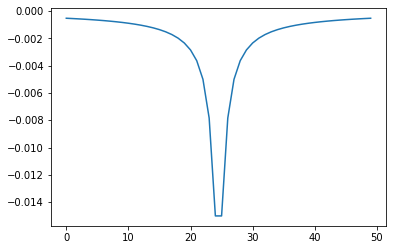

In [205]:
# Define potential
r = np.sqrt(X**2 + Y**2 + Z**2)
V = -1  / (4*np.pi * r)

plt.plot(sl(V))
plt.show()

In [206]:
# define an Hamiltonian
acc = 2

V_matrix = scipy.sparse.diags(V.reshape(-1))
laplace = FinDiff(0, dx, 2, acc=acc) + FinDiff(1, dy, 2, acc=acc) + FinDiff(2, dz, 2, acc=acc)
T = -0.5 * laplace.matrix(X.shape)
H = T + V_matrix

In [207]:
# solve
a_0 = 4 * np.pi
psi_0 = 2 / a_0 ** 1.5 * np.exp(-r / a_0)

k = 10
energies, functions = scipy.sparse.linalg.eigs(H, which='SR', k=k, v0=psi_0)

print(energies)
states = [(energies[i], functions[:, i].reshape(X.shape)) for i in range(k)]


[-0.00300801+0.j -0.00077495+0.j -0.00079567+0.j -0.00079567+0.j
 -0.00079567+0.j -0.00045046+0.j -0.00045046+0.j -0.00045046+0.j
 -0.00043848+0.j -0.00043848+0.j]


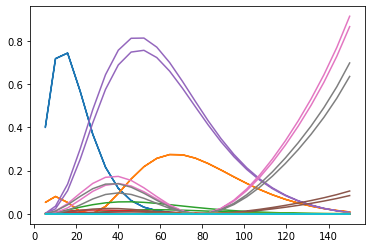

In [208]:
# radial density
for E, psi in states:
    slice_plot(r, prn(psi) * r**2)

plt.show()

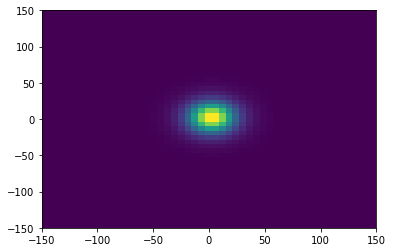

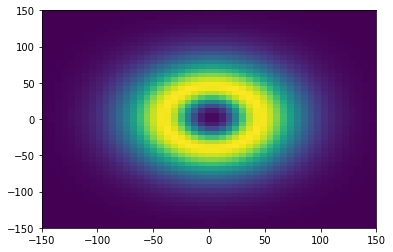

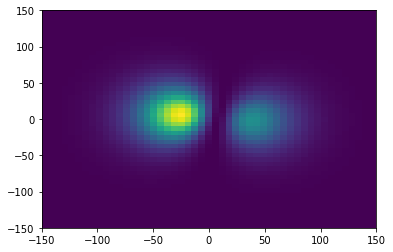

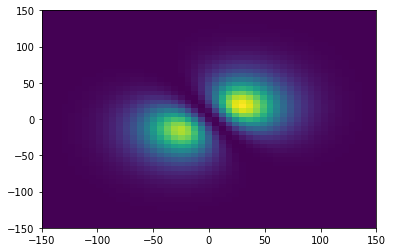

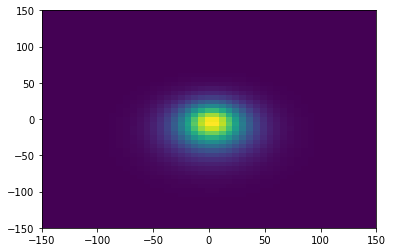

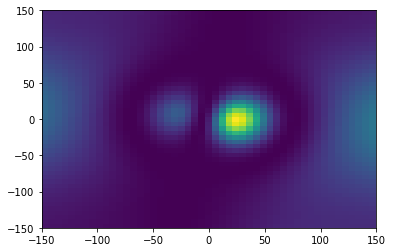

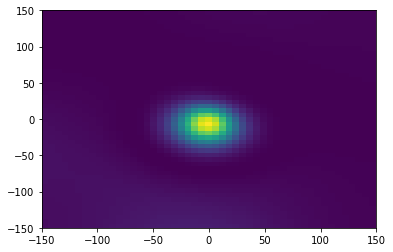

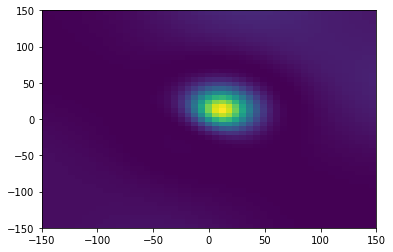

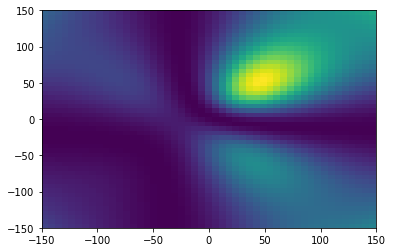

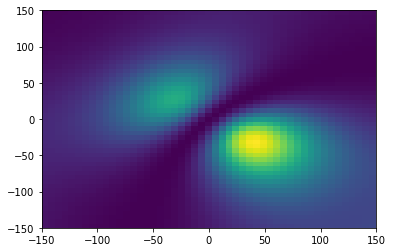

In [209]:

for E, psi in states:
    plt.pcolormesh(X[:, :, 20], Y[:, :, 20], prn(psi[:, :, 20]))
    plt.show()